In [ ]:
from  tensorflow import keras
from  keras import datasets
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras import  datasets
from matplotlib import pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [ ]:
input=Input(shape=(28,28))
x1=Flatten()(input)
x2=Dense(120,activation = 'tanh')(x1)
x3=Dense(84,activation = 'tanh')(x2)
output=Dense(10,activation = 'softmax',name='name1')(x3)
model = Model(inputs=input,outputs=output,name="mnist_model")

model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 name1 (Dense)               (None, 10)                850       
                                                                 
Total params: 105,214
Trainable params: 105,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.3418 - accuracy: 0.9025 - val_loss: 0.2047 - val_accuracy: 0.9384
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1656 - accuracy: 0.9519 - val_loss: 0.1421 - val_accuracy: 0.9585
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1170 - accuracy: 0.9652 - val_loss: 0.1105 - val_accuracy: 0.9679
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0887 - accuracy: 0.9731 - val_loss: 0.1012 - val_accuracy: 0.9683
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0672 - accuracy: 0.9803 - val_loss: 0.0907 - val_accuracy: 0.9713
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0541 - accuracy: 0.9842 - val_loss: 0.0858 - val_accuracy: 0.9724
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0433 - accuracy: 0.9874 - val_loss: 0.0852 - val_accuracy: 0.9734
E

In [ ]:
score = model.evaluate(x_train, y_train)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9961


In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0829 - accuracy: 0.9751


In [ ]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [ ]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [ ]:
print(y_pred[0])
print(y_pred1[0])

[1.62898937e-06 9.50078594e-09 8.11358768e-06 5.17077220e-04
 7.02108096e-08 6.07007706e-08 3.75145692e-10 9.99357522e-01
 1.27613555e-06 1.14287264e-04]
7


In [ ]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test,y_pred1))
accuracy_score(y_test,y_pred1)*100

[[ 969    0    1    2    0    2    5    0    1    0]
 [   0 1123    2    4    0    1    2    1    2    0]
 [   6    1 1000   10    1    0    2    3    9    0]
 [   1    0    1  995    0    2    0    4    7    0]
 [   0    0    6    1  954    1    2    2    0   16]
 [   4    0    1   16    5  852    6    1    4    3]
 [   5    3    2    1    2    6  939    0    0    0]
 [   2    4    8    4    2    0    0  992    5   11]
 [   3    1    2    9    3    3    2    4  944    3]
 [   3    3    0   11    6    1    0    1    1  983]]


97.50999999999999

[4.5783981e-09 9.9981213e-01 1.2955315e-05 1.0546241e-04 9.1208456e-08
 2.2274465e-07 1.7130812e-06 2.1664662e-05 4.2592463e-05 3.1251323e-06]
1


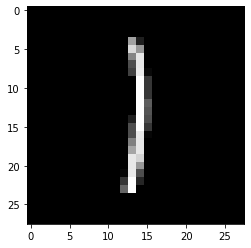

In [ ]:
plt.imshow(x_test[40],cmap="gray")
print(y_pred[40])
print(y_pred1[40])

In [ ]:
model.save('mnist.h5')

In [ ]:
results.history['val_accuracy']

[0.9383999705314636,
 0.9585000276565552,
 0.9678999781608582,
 0.9682999849319458,
 0.9713000059127808,
 0.9724000096321106,
 0.9733999967575073,
 0.9743000268936157,
 0.9778000116348267,
 0.9750999808311462]

In [ ]:
results.history['accuracy']

[0.9025166630744934,
 0.9518666863441467,
 0.9651833176612854,
 0.9731333255767822,
 0.9803000092506409,
 0.9842166900634766,
 0.9873833060264587,
 0.9904999732971191,
 0.9922500252723694,
 0.9942166805267334]

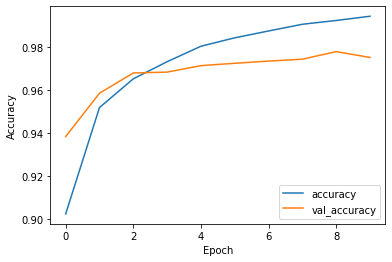

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')